In [44]:
#Importacion de librerias y creacion inicial de los dataframe por cada estacion de medicion
import pandas as pd
from sklearn.impute import SimpleImputer #Reemplazo de datos faltantes
import numpy as np
import matplotlib.pyplot as plt

df_tablaGN = pd.DataFrame()
df_tablaPC = pd.DataFrame()
df_tablaCD = pd.DataFrame()

In [45]:
#Lectura y agrupamiento de ficheros con la informacion de las distintas estaciones de medicion de la contaminacion en 
# los distintos años
for anio in range(17,20) :
    df_GN = pd.read_csv('D:/lvs/Master/ProyectoTFM/datos/contaminacion_GN_20'+str(anio)+'01-12.csv')
    df_tablaGN = pd.concat([df_tablaGN, df_GN]) 
    
    df_PC = pd.read_csv('D:/lvs/Master/ProyectoTFM/datos/contaminacion_PC_20'+str(anio)+'01-12.csv')
    df_tablaPC = pd.concat([df_tablaPC, df_PC])
    
    df_CD = pd.read_csv('D:/lvs/Master/ProyectoTFM/datos/contaminacion_CD_20'+str(anio)+'01-12.csv')
    df_tablaCD = pd.concat([df_tablaCD, df_CD])

In [3]:
## Descripcion de los datos por estacion de medicion.

In [39]:
#df_tablaGN[['SO2_Media','SO2_Mediana','SO2_Max','SO2_Min','PART_Media','PART_Mediana','PART_Max','PART_Min','NO2_Media', 'NO2_Mediana', 'NO2_Max']].describe()
df_tablaGN[['NO2_Min', 'CO_Media', 'CO_Mediana', 'CO_Max', 'CO_Min', 'O3_Media', 'O3_Mediana', 'O3_Max', 'O3_Min']].describe()

,NO2_Min,CO_Media,CO_Mediana,CO_Max,CO_Min,O3_Media,O3_Mediana,O3_Max,O3_Min
count,1043.000000,1026.000000,1026.000000,1026.000000,1026.000000,0.0,0.0,0.0,0.0
mean,14.318313,668.688730,627.271930,1287.349903,447.709552,NaN,NaN,NaN,NaN
std,9.888550,2670.548558,2751.052415,3170.880946,2314.064388,NaN,NaN,NaN,NaN
min,0.000000,181.055556,156.000000,347.000000,100.000000,NaN,NaN,NaN,NaN
25%,8.000000,404.936007,381.000000,742.250000,241.000000,NaN,NaN,NaN,NaN
50%,12.000000,519.788194,480.250000,978.000000,332.000000,NaN,NaN,NaN,NaN
75%,18.000000,710.081597,658.375000,1396.500000,455.000000,NaN,NaN,NaN,NaN
max,71.000000,85682.857143,88312.000000,99150.000000,74173.000000,NaN,NaN,NaN,NaN


In [47]:
#df_tablaPC[['SO2_Media','SO2_Mediana','SO2_Max','SO2_Min','PART_Media','PART_Mediana','PART_Max','PART_Min','NO2_Media', 'NO2_Mediana', 'NO2_Max']].describe()
df_tablaPC[['NO2_Min', 'CO_Media', 'CO_Mediana', 'CO_Max', 'CO_Min', 'O3_Media', 'O3_Mediana', 'O3_Max', 'O3_Min']].describe()

,NO2_Min,CO_Media,CO_Mediana,CO_Max,CO_Min,O3_Media,O3_Mediana,O3_Max,O3_Min
count,973.000000,917.000000,917.000000,917.000000,917.000000,1017.000000,1017.000000,1017.000000,1017.000000
mean,9.229188,280.395118,257.432388,628.202835,171.789531,53.667062,52.152409,95.572271,11.526057
std,20.415436,1173.520492,1173.576045,1238.372940,1169.473957,22.243077,23.410564,27.565151,12.086042
min,0.000000,1.222222,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,155.701389,135.500000,322.000000,94.000000,35.611111,34.000000,75.000000,2.000000
50%,7.000000,208.416667,198.500000,467.000000,117.000000,57.380000,57.000000,96.000000,7.000000
75%,10.000000,280.409722,239.500000,668.000000,132.000000,72.180556,71.000000,116.000000,18.000000
max,500.000000,32061.000000,32061.000000,32061.000000,32061.000000,106.062500,112.500000,175.000000,71.000000


In [49]:
#df_tablaCD[['SO2_Media','SO2_Mediana','SO2_Max','SO2_Min','PART_Media','PART_Mediana','PART_Max','PART_Min','NO2_Media', 'NO2_Mediana', 'NO2_Max']].describe()
df_tablaCD[['NO2_Min', 'CO_Media', 'CO_Mediana', 'CO_Max', 'CO_Min', 'O3_Media', 'O3_Mediana', 'O3_Max', 'O3_Min']].describe()

,NO2_Min,CO_Media,CO_Mediana,CO_Max,CO_Min,O3_Media,O3_Mediana,O3_Max,O3_Min
count,1035.000000,1029.000000,1029.000000,1029.000000,1029.000000,1024.000000,1024.000000,1024.000000,1024.000000
mean,3.069565,138.707705,118.982507,375.554908,76.253644,59.125345,57.411133,103.731445,11.768555
std,4.634722,347.646442,339.677109,528.521641,331.324243,23.948156,28.370737,27.306829,13.530464
min,0.000000,6.173611,6.000000,13.000000,2.000000,2.650000,3.000000,4.000000,0.000000
25%,0.000000,68.729167,60.500000,128.000000,25.000000,39.734375,34.500000,83.000000,3.000000
50%,2.000000,98.291667,89.000000,199.000000,62.000000,62.565972,63.000000,106.000000,6.000000
75%,4.000000,130.208333,117.500000,398.000000,78.000000,78.555556,80.500000,125.000000,16.000000
max,45.000000,5361.151515,5361.000000,5374.000000,5352.000000,123.230769,131.000000,182.000000,81.000000


In [7]:
## Representacion grafica contaminacion

In [50]:
# Creacion de columna con los meses de los distintos registros para su siguientes agrupamiento
# Extraccion del mes de la columna fecha: df_tablaGN["fecha"].str[0:7]
df_tablaGN["mes"] = df_tablaGN["fecha"].str[5:7]
df_tablaPC["mes"] = df_tablaPC["fecha"].str[5:7]
df_tablaCD["mes"] = df_tablaCD["fecha"].str[5:7]

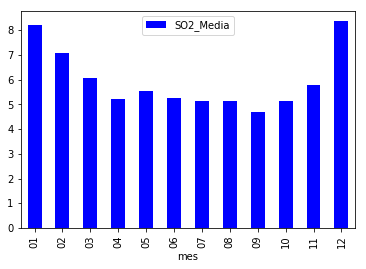

In [51]:
df_tablaGN.groupby("mes")['SO2_Media'].mean().plot(kind = 'bar', legend = 'Reverese', color='blue')

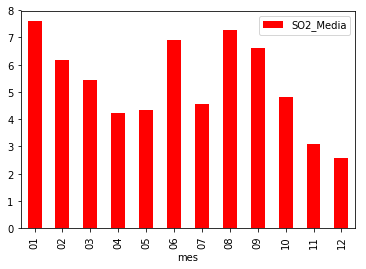

In [52]:
df_tablaPC.groupby("mes")['SO2_Media'].mean().plot(kind = 'bar', legend = 'Reverese', color='red')

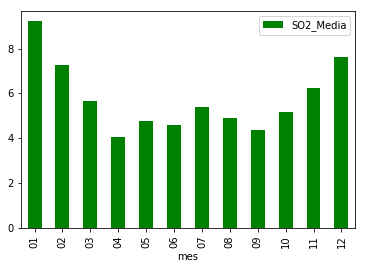

In [53]:
df_tablaCD.groupby("mes")['SO2_Media'].mean().plot(kind = 'bar', legend = 'Reverese', color='green')

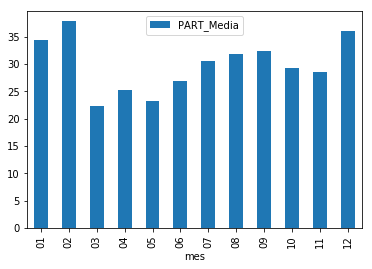

In [54]:
df_tablaGN.groupby("mes")['PART_Media'].mean().plot(kind = 'bar', legend = 'Reverese')

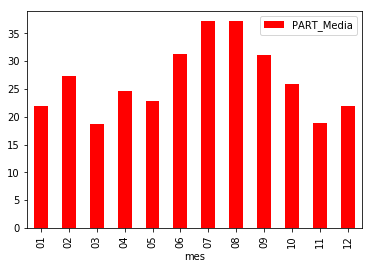

In [55]:
df_tablaPC.groupby("mes")['PART_Media'].mean().plot(kind = 'bar', legend = 'Reverese', color='red')

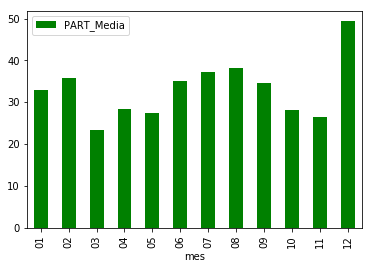

In [56]:
df_tablaCD.groupby("mes")['PART_Media'].mean().plot(kind = 'bar', legend = 'Reverese', color='green')

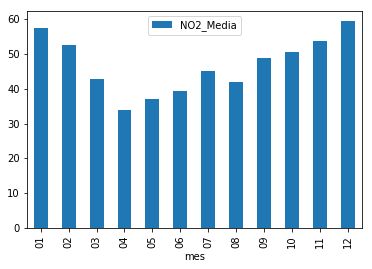

In [57]:
df_tablaGN.groupby("mes")['NO2_Media'].mean().plot(kind = 'bar', legend = 'Reverese')

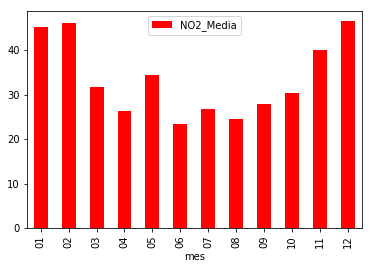

In [58]:
df_tablaPC.groupby("mes")['NO2_Media'].mean().plot(kind = 'bar', legend = 'Reverese', color='red')

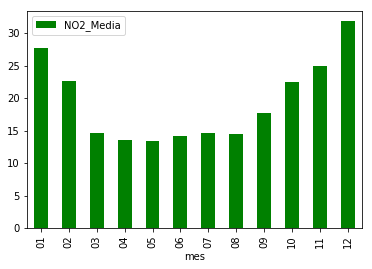

In [59]:
df_tablaCD.groupby("mes")['NO2_Media'].mean().plot(kind = 'bar', legend = 'Reverese', color='green')

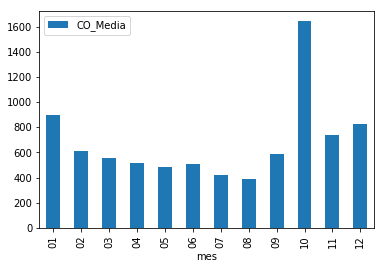

In [60]:
df_tablaGN.groupby("mes")['CO_Media'].mean().plot(kind = 'bar', legend = 'Reverese')

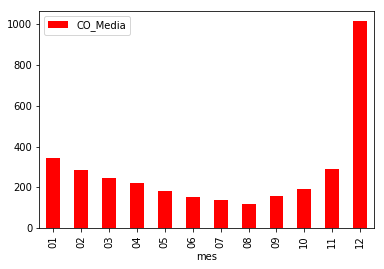

In [61]:
df_tablaPC.groupby("mes")['CO_Media'].mean().plot(kind = 'bar', legend = 'Reverese', color='red')

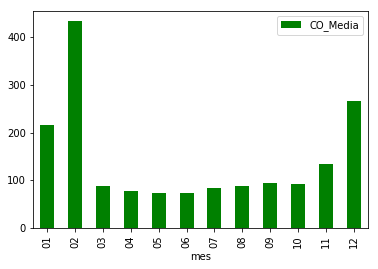

In [62]:
df_tablaCD.groupby("mes")['CO_Media'].mean().plot(kind = 'bar', legend = 'Reverese', color='green')

In [29]:
## Empezamos tratamiento de datos, datos faltantes

In [30]:
df_tablaGN = df_tablaGN.reset_index()
si_tablaGN  = SimpleImputer()
si_tablaGN.fit(df_tablaGN[['SO2_Media','SO2_Mediana','SO2_Max','SO2_Min','PART_Media','PART_Mediana','PART_Max','PART_Min','NO2_Media', 'NO2_Mediana', 'NO2_Max', 'NO2_Min', 'CO_Media', 'CO_Mediana', 'CO_Max', 'CO_Min']])

df_tablaPC = df_tablaPC.reset_index()
si_tablaPC  = SimpleImputer()
si_tablaPC.fit(df_tablaPC[['SO2_Media','SO2_Mediana','SO2_Max','SO2_Min','PART_Media','PART_Mediana','PART_Max','PART_Min','NO2_Media', 'NO2_Mediana', 'NO2_Max', 'NO2_Min', 'CO_Media', 'CO_Mediana', 'CO_Max', 'CO_Min']])

df_tablaCD = df_tablaCD.reset_index()
si_tablaCD  = SimpleImputer()
si_tablaCD.fit(df_tablaCD[['SO2_Media','SO2_Mediana','SO2_Max','SO2_Min','PART_Media','PART_Mediana','PART_Max','PART_Min','NO2_Media', 'NO2_Mediana', 'NO2_Max', 'NO2_Min', 'CO_Media', 'CO_Mediana', 'CO_Max', 'CO_Min']])

SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
       verbose=0)

In [32]:
df_tablaGN["SO2_Media"] = si_tablaGN.fit_transform(df_tablaGN["SO2_Media"].values.reshape(-1, 1))
df_tablaGN["SO2_Mediana"] = si_tablaGN.fit_transform(df_tablaGN["SO2_Mediana"].values.reshape(-1, 1))
df_tablaGN["SO2_Max"] = si_tablaGN.fit_transform(df_tablaGN["SO2_Max"].values.reshape(-1, 1))
df_tablaGN["SO2_Min"] = si_tablaGN.fit_transform(df_tablaGN["SO2_Min"].values.reshape(-1, 1))
df_tablaGN["PART_Media"] = si_tablaGN.fit_transform(df_tablaGN["PART_Media"].values.reshape(-1, 1))
df_tablaGN["PART_Mediana"] = si_tablaGN.fit_transform(df_tablaGN["PART_Mediana"].values.reshape(-1, 1))
df_tablaGN["PART_Max"] = si_tablaGN.fit_transform(df_tablaGN["PART_Max"].values.reshape(-1, 1))
df_tablaGN["PART_Min"] = si_tablaGN.fit_transform(df_tablaGN["PART_Min"].values.reshape(-1, 1))
df_tablaGN["NO2_Media"] = si_tablaGN.fit_transform(df_tablaGN["NO2_Media"].values.reshape(-1, 1))
df_tablaGN["NO2_Mediana"] = si_tablaGN.fit_transform(df_tablaGN["NO2_Mediana"].values.reshape(-1, 1))
df_tablaGN["NO2_Max"] = si_tablaGN.fit_transform(df_tablaGN["NO2_Max"].values.reshape(-1, 1))
df_tablaGN["NO2_Min"] = si_tablaGN.fit_transform(df_tablaGN["NO2_Min"].values.reshape(-1, 1))
df_tablaGN["CO_Media"] = si_tablaGN.fit_transform(df_tablaGN["CO_Media"].values.reshape(-1, 1))
df_tablaGN["CO_Mediana"] = si_tablaGN.fit_transform(df_tablaGN["CO_Mediana"].values.reshape(-1, 1))
df_tablaGN["CO_Max"] = si_tablaGN.fit_transform(df_tablaGN["CO_Max"].values.reshape(-1, 1))
df_tablaGN["CO_Min"] = si_tablaGN.fit_transform(df_tablaGN["CO_Min"].values.reshape(-1, 1))

df_tablaPC["SO2_Media"] = si_tablaPC.fit_transform(df_tablaPC["SO2_Media"].values.reshape(-1, 1))
df_tablaPC["SO2_Mediana"] = si_tablaPC.fit_transform(df_tablaPC["SO2_Mediana"].values.reshape(-1, 1))
df_tablaPC["SO2_Max"] = si_tablaPC.fit_transform(df_tablaPC["SO2_Max"].values.reshape(-1, 1))
df_tablaPC["SO2_Min"] = si_tablaPC.fit_transform(df_tablaPC["SO2_Min"].values.reshape(-1, 1))
df_tablaPC["PART_Media"] = si_tablaPC.fit_transform(df_tablaPC["PART_Media"].values.reshape(-1, 1))
df_tablaPC["PART_Mediana"] = si_tablaPC.fit_transform(df_tablaPC["PART_Mediana"].values.reshape(-1, 1))
df_tablaPC["PART_Max"] = si_tablaPC.fit_transform(df_tablaPC["PART_Max"].values.reshape(-1, 1))
df_tablaPC["PART_Min"] = si_tablaPC.fit_transform(df_tablaPC["PART_Min"].values.reshape(-1, 1))
df_tablaPC["NO2_Media"] = si_tablaPC.fit_transform(df_tablaPC["NO2_Media"].values.reshape(-1, 1))
df_tablaPC["NO2_Mediana"] = si_tablaPC.fit_transform(df_tablaPC["NO2_Mediana"].values.reshape(-1, 1))
df_tablaPC["NO2_Max"] = si_tablaPC.fit_transform(df_tablaPC["NO2_Max"].values.reshape(-1, 1))
df_tablaPC["NO2_Min"] = si_tablaPC.fit_transform(df_tablaPC["NO2_Min"].values.reshape(-1, 1))
df_tablaPC["CO_Media"] = si_tablaPC.fit_transform(df_tablaPC["CO_Media"].values.reshape(-1, 1))
df_tablaPC["CO_Mediana"] = si_tablaPC.fit_transform(df_tablaPC["CO_Mediana"].values.reshape(-1, 1))
df_tablaPC["CO_Max"] = si_tablaPC.fit_transform(df_tablaPC["CO_Max"].values.reshape(-1, 1))
df_tablaPC["CO_Min"] = si_tablaPC.fit_transform(df_tablaPC["CO_Min"].values.reshape(-1, 1))

df_tablaCD["SO2_Media"] = si_tablaCD.fit_transform(df_tablaCD["SO2_Media"].values.reshape(-1, 1))
df_tablaCD["SO2_Mediana"] = si_tablaCD.fit_transform(df_tablaCD["SO2_Mediana"].values.reshape(-1, 1))
df_tablaCD["SO2_Max"] = si_tablaCD.fit_transform(df_tablaCD["SO2_Max"].values.reshape(-1, 1))
df_tablaCD["SO2_Min"] = si_tablaCD.fit_transform(df_tablaCD["SO2_Min"].values.reshape(-1, 1))
df_tablaCD["PART_Media"] = si_tablaCD.fit_transform(df_tablaCD["PART_Media"].values.reshape(-1, 1))
df_tablaCD["PART_Mediana"] = si_tablaCD.fit_transform(df_tablaCD["PART_Mediana"].values.reshape(-1, 1))
df_tablaCD["PART_Max"] = si_tablaCD.fit_transform(df_tablaCD["PART_Max"].values.reshape(-1, 1))
df_tablaCD["PART_Min"] = si_tablaCD.fit_transform(df_tablaCD["PART_Min"].values.reshape(-1, 1))
df_tablaCD["NO2_Media"] = si_tablaCD.fit_transform(df_tablaCD["NO2_Media"].values.reshape(-1, 1))
df_tablaCD["NO2_Mediana"] = si_tablaCD.fit_transform(df_tablaCD["NO2_Mediana"].values.reshape(-1, 1))
df_tablaCD["NO2_Max"] = si_tablaCD.fit_transform(df_tablaCD["NO2_Max"].values.reshape(-1, 1))
df_tablaCD["NO2_Min"] = si_tablaCD.fit_transform(df_tablaCD["NO2_Min"].values.reshape(-1, 1))
df_tablaCD["CO_Media"] = si_tablaCD.fit_transform(df_tablaCD["CO_Media"].values.reshape(-1, 1))
df_tablaCD["CO_Mediana"] = si_tablaCD.fit_transform(df_tablaCD["CO_Mediana"].values.reshape(-1, 1))
df_tablaCD["CO_Max"] = si_tablaCD.fit_transform(df_tablaCD["CO_Max"].values.reshape(-1, 1))
df_tablaCD["CO_Min"] = si_tablaCD.fit_transform(df_tablaCD["CO_Min"].values.reshape(-1, 1))